In [1]:
from astropy import units as u
from astropy import time
import astropy
import numpy as np

from poliastro import iod
from poliastro.bodies import Body,Mars, Earth, Venus, Jupiter, Saturn, Uranus, Neptune, Sun, Europa, Ganymede, Callisto, Io, Titan
from poliastro.ephem import Ephem
from poliastro.maneuver import Maneuver
from poliastro.twobody import Orbit
from poliastro.util import time_range
from poliastro.plotting import OrbitPlotter3D, StaticOrbitPlotter
import math
import matplotlib.pyplot as plt
# More info: https://plotly.com/python/renderers/
import plotly.io as pio
from poliastro.util import norm, time_range
pio.renderers.default = "plotly_mimetype+notebook_connected"

from astropy.coordinates import solar_system_ephemeris

from poliastro.jupiter_atm_simple import JovianAtmosphereSimple

solar_system_ephemeris.set("jpl")

<ScienceState solar_system_ephemeris: 'jpl'>

AttributeError: 'int' object has no attribute 'any'

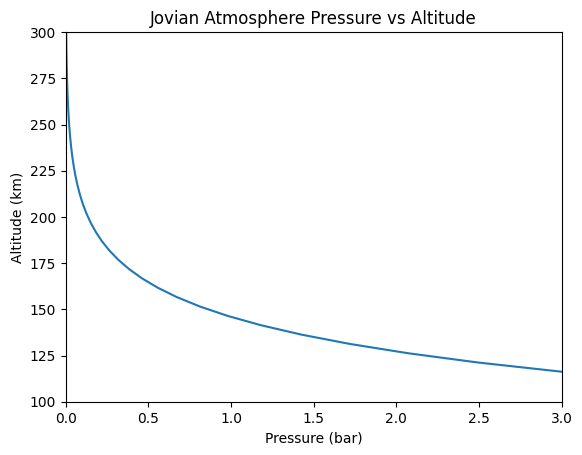

In [19]:
alts = np.linspace(0,500,100)*u.km
atmosphere = JovianAtmosphereSimple()
pressures = np.zeros(len(alts))

for i in range(len(alts)):
    #
    props=atmosphere.properties(alts[i].value)
    pressures[i] = props["pressure_Pa"]*u.Pa.to(u.bar)
    
plt.plot(pressures,alts)
plt.title("Jovian Atmosphere Pressure vs Altitude")
plt.xlabel("Pressure (bar)")
plt.ylabel("Altitude (km)")
plt.ylim(100,300)
plt.xlim(1e-12,3)

print(f"At 150 km, pressure is {atmosphere.properties(150)['pressure_Pa']*u.Pa.to(u.bar):.2e} bar while at 200 km, pressure is {atmosphere.properties(200)['pressure_Pa']*u.Pa.to(u.bar):.2e} bar.")